In [1]:
# import the necessary libraries 
import pandas as pd
import plotly.express as px
import plotly.io as pio
import statsmodels.formula.api as smf

# set plotly to render nicely in a jupyter environment 
pio.templates.default='plotly_white'

# Load the dataset
df = pd.read_csv('mcs2024-raree_world-1.csv')

In [2]:
# PHASE ONE
# Carry out EDA
# 1) summary of the dataframe
print(df.head())

    Source        Country                                               Type  \
0  MCS2024  United States  Rare earths, mine production, rare-earth-oxide...   
1  MCS2024      Australia  Rare earths, mine production, rare-earth-oxide...   
2  MCS2024         Brazil  Rare earths, mine production, rare-earth-oxide...   
3  MCS2024          Burma  Rare earths, mine production, rare-earth-oxide...   
4  MCS2024         Canada  Rare earths, mine production, rare-earth-oxide...   

   Prod_t_est_2022  Prod_t_est_2023 Prod_notes  Reserves_t  \
0          42000.0          43000.0        NaN   1800000.0   
1          18000.0          18000.0        NaN   5700000.0   
2             80.0             80.0        NaN  21000000.0   
3          12000.0          38000.0        NaN         NaN   
4              0.0              0.0        NaN    830000.0   

                                      Reserves_notes  Unnamed: 8  Unnamed: 9  \
0  Reserves for Australia, Russia, Thailand, and ...         NaN  

In [3]:
# 2) check features
df.columns.tolist()

['Source',
 'Country',
 'Type',
 'Prod_t_est_2022',
 'Prod_t_est_2023',
 'Prod_notes',
 'Reserves_t',
 'Reserves_notes',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Unnamed: 43']

In [4]:
# 3) check the basic statistical properties
print(df.describe())

       Prod_t_est_2022  Prod_t_est_2023    Reserves_t  Unnamed: 8  Unnamed: 9  \
count        16.000000        16.000000  1.300000e+01         0.0         0.0   
mean      37307.500000     43957.500000  1.733958e+07         NaN         NaN   
std       87227.809595    100951.369646  3.060515e+07         NaN         NaN   
min           0.000000         0.000000  4.500000e+03         NaN         NaN   
25%          60.000000        60.000000  8.900000e+05         NaN         NaN   
50%        1900.000000      1780.000000  5.700000e+06         NaN         NaN   
75%       13500.000000     23000.000000  2.100000e+07         NaN         NaN   
max      300000.000000    350000.000000  1.100000e+08         NaN         NaN   

       Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  ...  \
count          0.0          0.0          0.0          0.0          0.0  ...   
mean           NaN          NaN          NaN          NaN          NaN  ...   
std            NaN          NaN  

In [5]:
# 4) check for general info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Source           16 non-null     object 
 1   Country          16 non-null     object 
 2   Type             16 non-null     object 
 3   Prod_t_est_2022  16 non-null     float64
 4   Prod_t_est_2023  16 non-null     float64
 5   Prod_notes       1 non-null      object 
 6   Reserves_t       13 non-null     float64
 7   Reserves_notes   4 non-null      object 
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      0 non-null      float64
 12  Unnamed: 12      0 non-null      float64
 13  Unnamed: 13      0 non-null      float64
 14  Unnamed: 14      0 non-null      float64
 15  Unnamed: 15      0 non-null      float64
 16  Unnamed: 16      0 non-null      float64
 17  Unnamed: 17      0

In [6]:
# 5) check for null value
print(df.isna().sum())

Source             22
Country            22
Type               22
Prod_t_est_2022    22
Prod_t_est_2023    22
Prod_notes         37
Reserves_t         25
Reserves_notes     34
Unnamed: 8         38
Unnamed: 9         38
Unnamed: 10        38
Unnamed: 11        38
Unnamed: 12        38
Unnamed: 13        38
Unnamed: 14        38
Unnamed: 15        38
Unnamed: 16        38
Unnamed: 17        38
Unnamed: 18        38
Unnamed: 19        38
Unnamed: 20        38
Unnamed: 21        38
Unnamed: 22        38
Unnamed: 23        38
Unnamed: 24        38
Unnamed: 25        38
Unnamed: 26        38
Unnamed: 27        38
Unnamed: 28        38
Unnamed: 29        38
Unnamed: 30        38
Unnamed: 31        38
Unnamed: 32        38
Unnamed: 33        38
Unnamed: 34        38
Unnamed: 35        38
Unnamed: 36        38
Unnamed: 37        38
Unnamed: 38        38
Unnamed: 39        38
Unnamed: 40        38
Unnamed: 41        38
Unnamed: 42        38
Unnamed: 43        38
dtype: int64


In [7]:
# PHASE TWO
# Data cleaning and initial visualisation
# 1) clean column names, make them lowercase 
df.columns = df.columns.str.lower()
print(df.columns.tolist())

['source', 'country', 'type', 'prod_t_est_2022', 'prod_t_est_2023', 'prod_notes', 'reserves_t', 'reserves_notes', 'unnamed: 8', 'unnamed: 9', 'unnamed: 10', 'unnamed: 11', 'unnamed: 12', 'unnamed: 13', 'unnamed: 14', 'unnamed: 15', 'unnamed: 16', 'unnamed: 17', 'unnamed: 18', 'unnamed: 19', 'unnamed: 20', 'unnamed: 21', 'unnamed: 22', 'unnamed: 23', 'unnamed: 24', 'unnamed: 25', 'unnamed: 26', 'unnamed: 27', 'unnamed: 28', 'unnamed: 29', 'unnamed: 30', 'unnamed: 31', 'unnamed: 32', 'unnamed: 33', 'unnamed: 34', 'unnamed: 35', 'unnamed: 36', 'unnamed: 37', 'unnamed: 38', 'unnamed: 39', 'unnamed: 40', 'unnamed: 41', 'unnamed: 42', 'unnamed: 43']


In [8]:
# 2) Drop all rows that are NaN in these columns ['country', 'prod_t_est_2022', 'prod_t_est_2023']
df = df.dropna(subset=['country', 'prod_t_est_2022', 'prod_t_est_2023'], how='all')
print(df.shape)

(16, 44)


In [9]:
# 3) filter out the world total row
df = df[~df['country'].str.contains('World Total')]

In [10]:
# 4) check the remaining rows for analysis
print(f"Rows remaining for analysis: {len(df)}")

Rows remaining for analysis: 16


In [11]:
# 5) Remove unnamed columns
df.dropna(axis=1, how='all')

,source,country,type,prod_t_est_2022,prod_t_est_2023,prod_notes,reserves_t,reserves_notes
0,MCS2024,United States,"Rare earths, mine production, rare-earth-oxide...",42000.0,43000.0,NaN,1800000.0,"Reserves for Australia, Russia, Thailand, and ..."
1,MCS2024,Australia,"Rare earths, mine production, rare-earth-oxide...",18000.0,18000.0,NaN,5700000.0,"For Australia, Joint Ore Reserves Committee-co..."
2,MCS2024,Brazil,"Rare earths, mine production, rare-earth-oxide...",80.0,80.0,NaN,21000000.0,NaN
3,MCS2024,Burma,"Rare earths, mine production, rare-earth-oxide...",12000.0,38000.0,NaN,NaN,NaN
4,MCS2024,Canada,"Rare earths, mine production, rare-earth-oxide...",0.0,0.0,NaN,830000.0,NaN
5,MCS2024,China,"Rare earths, mine production, rare-earth-oxide...",210000.0,240000.0,Production quota; does not include undocumente...,44000000.0,NaN
6,MCS2024,Greenland,"Rare earths, mine production, rare-earth-oxide...",0.0,0.0,NaN,1500000.0,NaN
7,MCS2024,India,"Rare earths, mine production, rare-earth-oxide...",2900.0,2900.0,NaN,6900000.0,NaN
8,MCS2024,Madagascar,"Rare earths, mine production, rare-earth-oxide...",960.0,960.0,NaN,NaN,NaN
9,MCS2024,Malaysia,"Rare earths, mine production, rare-earth-oxide...",80.0,80.0,NaN,NaN,NaN


In [12]:
# 6) REmove the columns ['prod_notes', 'reserves_notes']
df = df.drop(columns=['prod_notes', 'reserves_notes'], errors='ignore')
print(df.head())

    source        country                                               type  \
0  MCS2024  United States  Rare earths, mine production, rare-earth-oxide...   
1  MCS2024      Australia  Rare earths, mine production, rare-earth-oxide...   
2  MCS2024         Brazil  Rare earths, mine production, rare-earth-oxide...   
3  MCS2024          Burma  Rare earths, mine production, rare-earth-oxide...   
4  MCS2024         Canada  Rare earths, mine production, rare-earth-oxide...   

   prod_t_est_2022  prod_t_est_2023  reserves_t  unnamed: 8  unnamed: 9  \
0          42000.0          43000.0   1800000.0         NaN         NaN   
1          18000.0          18000.0   5700000.0         NaN         NaN   
2             80.0             80.0  21000000.0         NaN         NaN   
3          12000.0          38000.0         NaN         NaN         NaN   
4              0.0              0.0    830000.0         NaN         NaN   

   unnamed: 10  unnamed: 11  ...  unnamed: 34  unnamed: 35  unnamed:

In [13]:
print(df.columns.tolist())

['source', 'country', 'type', 'prod_t_est_2022', 'prod_t_est_2023', 'reserves_t', 'unnamed: 8', 'unnamed: 9', 'unnamed: 10', 'unnamed: 11', 'unnamed: 12', 'unnamed: 13', 'unnamed: 14', 'unnamed: 15', 'unnamed: 16', 'unnamed: 17', 'unnamed: 18', 'unnamed: 19', 'unnamed: 20', 'unnamed: 21', 'unnamed: 22', 'unnamed: 23', 'unnamed: 24', 'unnamed: 25', 'unnamed: 26', 'unnamed: 27', 'unnamed: 28', 'unnamed: 29', 'unnamed: 30', 'unnamed: 31', 'unnamed: 32', 'unnamed: 33', 'unnamed: 34', 'unnamed: 35', 'unnamed: 36', 'unnamed: 37', 'unnamed: 38', 'unnamed: 39', 'unnamed: 40', 'unnamed: 41', 'unnamed: 42', 'unnamed: 43']


In [14]:
# Drop all unnamed columns
df = df.loc[:, ~df.columns.str.contains('^unnamed', case=False)]
print(df.head())

    source        country                                               type  \
0  MCS2024  United States  Rare earths, mine production, rare-earth-oxide...   
1  MCS2024      Australia  Rare earths, mine production, rare-earth-oxide...   
2  MCS2024         Brazil  Rare earths, mine production, rare-earth-oxide...   
3  MCS2024          Burma  Rare earths, mine production, rare-earth-oxide...   
4  MCS2024         Canada  Rare earths, mine production, rare-earth-oxide...   

   prod_t_est_2022  prod_t_est_2023  reserves_t  
0          42000.0          43000.0   1800000.0  
1          18000.0          18000.0   5700000.0  
2             80.0             80.0  21000000.0  
3          12000.0          38000.0         NaN  
4              0.0              0.0    830000.0  


In [15]:
print(df.head())

    source        country                                               type  \
0  MCS2024  United States  Rare earths, mine production, rare-earth-oxide...   
1  MCS2024      Australia  Rare earths, mine production, rare-earth-oxide...   
2  MCS2024         Brazil  Rare earths, mine production, rare-earth-oxide...   
3  MCS2024          Burma  Rare earths, mine production, rare-earth-oxide...   
4  MCS2024         Canada  Rare earths, mine production, rare-earth-oxide...   

   prod_t_est_2022  prod_t_est_2023  reserves_t  
0          42000.0          43000.0   1800000.0  
1          18000.0          18000.0   5700000.0  
2             80.0             80.0  21000000.0  
3          12000.0          38000.0         NaN  
4              0.0              0.0    830000.0  


In [16]:
print(df['reserves_t'])

0       1800000.0
1       5700000.0
2      21000000.0
3             NaN
4        830000.0
5      44000000.0
6       1500000.0
7       6900000.0
8             NaN
9             NaN
10     10000000.0
11       790000.0
12       890000.0
13         4500.0
14     22000000.0
15    110000000.0
Name: reserves_t, dtype: float64


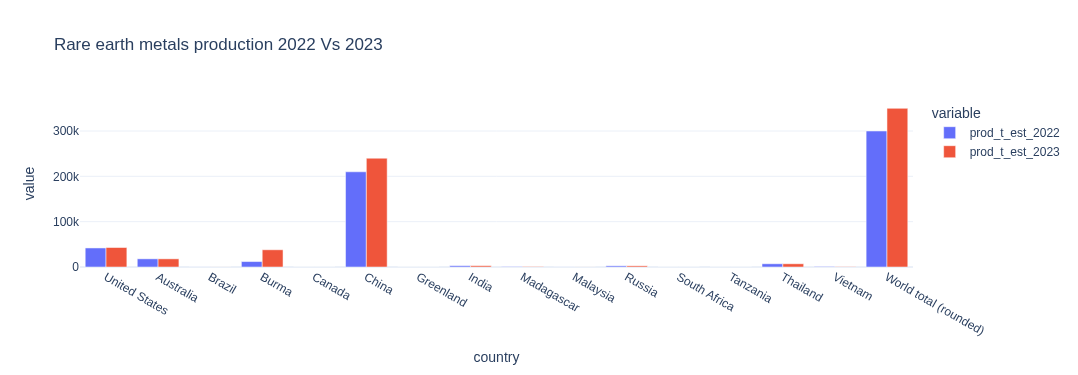

In [17]:
# initial visualization 1
#  Production comparison chart for 2022 and 2023
fig_prod = px.bar(df, x='country', y=['prod_t_est_2022', 'prod_t_est_2023'], title='Rare earth metals production 2022 Vs 2023', barmode='group')

#save the chart as a PNG image
fig_prod.write_image('REE_production_comparison.PNG', width=1000, height=600, scale=2)
fig_prod.show()

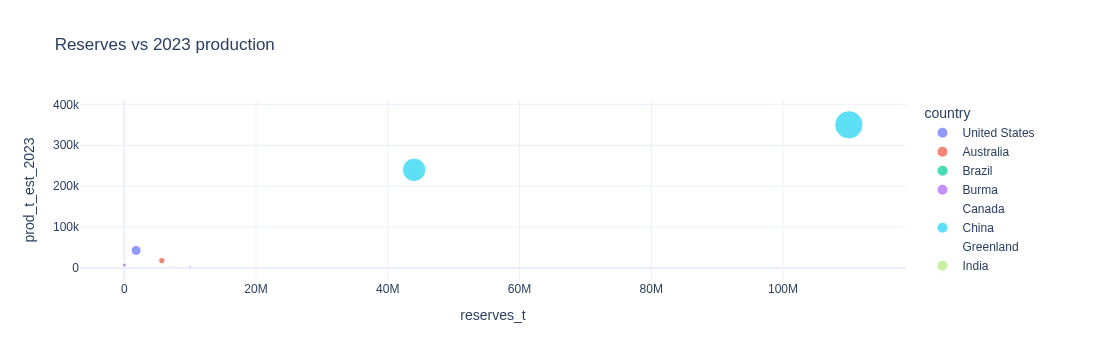

In [18]:
# comparison of productio and reserves
fig_res = px.scatter(df, x='reserves_t', y='prod_t_est_2023', size='prod_t_est_2023', color='country', title='Reserves vs 2023 production', hover_name='country')
fig_res.write_image('REE_prod_reserves.PNG', width=1000, height=600, scale=2)
fig_res.show()

In [20]:
# Total production for 2023
total_2023_prod = df['prod_t_est_2023'].sum()

#Market share for each country 
df['market share (%)'] = (df['prod_t_est_2023']/total_2023_prod)*100

# sort the columns
df_mkt_share = df[['country', 'prod_t_est_2023', 'market share (%)']].sort_values(by='market share (%)', ascending=False)

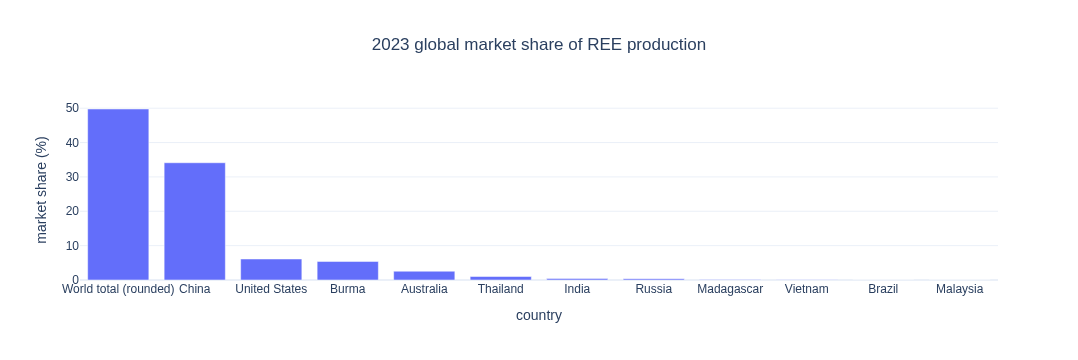

In [25]:
 # Data visualization of market share
# filter enries below 0%
# Save the market share to a CSV file
df_plot = df_mkt_share[df_mkt_share['market share (%)']>0]
fig = px.bar(df_plot, x='country',
             y='market share (%)', 
              title='2023 global market share of REE production', 
                labels={'market share (%)':'market share (%)', 'country':'country'}, 
                  hover_data={'prod_t_est_2023':True, 'country':True, 'market share (%)': ':.2f'}
            )

fig.update_layout(title_x=0.5)

fig.write_image('REE_prod_market_share.PNG', width=1000, height=600, scale=2)
fig.show()

df_mkt_share.to_csv('REE_market_share.CSV', index=False)

            

In [24]:
print(df_mkt_share.columns.tolist())

['country', 'prod_t_est_2023', 'market share (%)']


In [34]:
# PHASE FOUR
# Predictive Analysis
# define and fit the ordinary least squares method

model = smf.ols('reserves_t ~ prod_t_est_2023', data=df).fit()

print(type(model))
print(model.summary())

<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>
                            OLS Regression Results                            
Dep. Variable:             reserves_t   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     65.30
Date:                Fri, 09 Jan 2026   Prob (F-statistic):           5.93e-06
Time:                        00:23:17   Log-Likelihood:                -229.41
No. Observations:                  13   AIC:                             462.8
Df Residuals:                      11   BIC:                             464.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

/home/onome23/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.

